In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [11]:
class_names = ['oiseau', 'chat', 'cerf', 
               'chien', 'grenouille', 'cheval']

(x_train, y_train), (x_final, y_final) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_final = x_final.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_final = to_categorical(y_final)

animal_indices = np.where(np.isin(y_train.argmax(axis=1), [2, 3, 4, 5, 6, 7]))[0]
x_animals = x_train[animal_indices]
y_animals = y_train[animal_indices]

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dense(200000, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))

inputs = Input(shape=(32, 32, 3))

x = Flatten()(inputs)
 
x = (BatchNormalization())(x)
x = Dense(200, activation='relu')(x)
x = Dense(150, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)
 
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 200)               614600    
                                                                 
 dense_26 (Dense)            (None, 150)               30150     
                                                                 
 dense_27 (Dense)            (None, 10)                1510      
                                                           

In [16]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
history = model.fit(x_animals, y_animals, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
938/938 [==============================] - 15s 14ms/step - loss: 1.5840 - accuracy: 0.3868
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 1.3792 - accuracy: 0.4623
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 1.2940 - accuracy: 0.4981
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 1.2329 - accuracy: 0.5256
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 1.1684 - accuracy: 0.5519
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 1.1181 - accuracy: 0.5738
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 1.0633 - accuracy: 0.5923
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 1.0171 - accuracy: 0.6152
Epoch 9/10
938/938 [==============================] - 13s 14ms/step - loss: 0.9738 - accuracy: 0.6278
Epoch 10/10
938/938 [==============================] - 12s 13ms/step - loss: 0.920

In [18]:
loss, accuracy = model.evaluate(x_final, y_final)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 11.6958 - accuracy: 0.3054
Test loss: 11.695796966552734
Test accuracy: 0.305400013923645


Text(0, 0.5, 'Accuracy + loss')

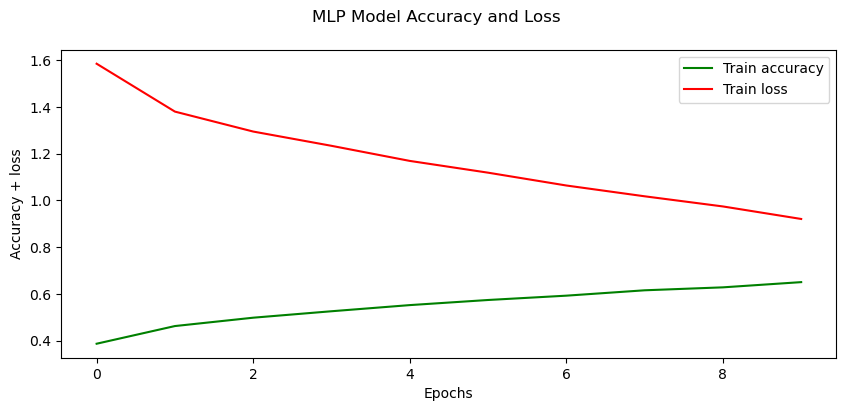

In [19]:
fig, (ax1) = plt.subplots(1, figsize=(10, 4))
fig.suptitle("MLP Model Accuracy and Loss")

sns.lineplot(x=history.epoch, y=history.history['accuracy'], label="Train accuracy",c = "green")
sns.lineplot(x=history.epoch, y=history.history['loss'], label="Train loss",c = "red")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy + loss")

le MLP est et plus rapide mais pas trés adapeté de ce que j'ai lu c'est tout a fais normale les donnée sont tros complex